<a href="https://colab.research.google.com/github/jahnavi-coder31/githubemc1/blob/main/brainwave_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("sentimentdataset.csv")
print("Shape of dataset:", df.shape)
df.head()

Saving sentimentdataset.csv to sentimentdataset (1).csv
Shape of dataset: (732, 15)


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None
Sentiment
Positive               44
Joy                    42
Excitement             32
Happy   

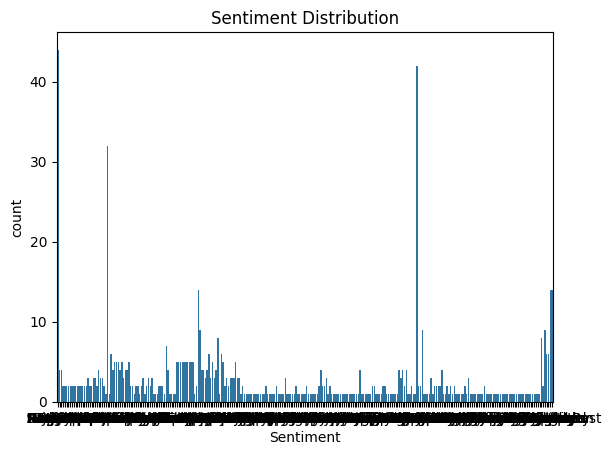

In [ ]:

print(df.info())
print(df['Sentiment'].value_counts())

sns.countplot(data=df, x='Sentiment')
plt.title("Sentiment Distribution")
plt.show()

In [ ]:
X = df['Text']        # Correct column
y = df['Sentiment']   # Correct column


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.11564625850340136

Classification Report:
                         precision    recall  f1-score   support

         Acceptance          0.00      0.00      0.00         2
      Acceptance             0.00      0.00      0.00         0
           Admiration        0.00      0.00      0.00         1
        Admiration           0.00      0.00      0.00         1
         Affection           0.00      0.00      0.00         1
      Ambivalence            0.00      0.00      0.00         1
         Anger               0.00      0.00      0.00         1
        Anticipation         0.00      0.00      0.00         1
        Arousal              0.00      0.00      0.00         3
                  Awe        0.00      0.00      0.00         1
         Awe                 0.00      0.00      0.00         1
                  Bad        0.00      0.00      0.00         1
             Betrayal        0.00      0.00      0.00         2
        Betrayal             0.00      0.00     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

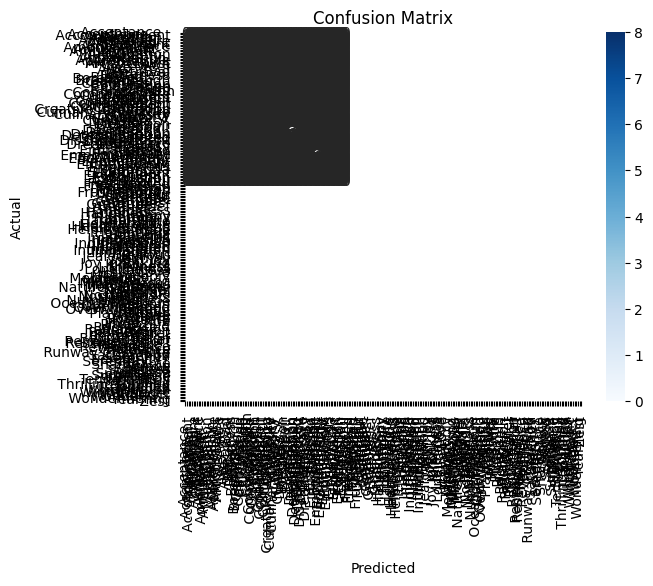

In [ ]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
df = df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], errors="ignore")

df.rename(columns={"Text": "text", "Sentiment": "sentiment"}, inplace=True)

print("Cleaned columns:", df.columns.tolist())

Cleaned columns: ['text', 'sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour']


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.10884353741496598

Naive Bayes Classification Report:
                         precision    recall  f1-score   support

         Acceptance          0.00      0.00      0.00         2
           Admiration        0.00      0.00      0.00         1
        Admiration           0.00      0.00      0.00         1
         Affection           0.00      0.00      0.00         1
      Ambivalence            0.00      0.00      0.00         1
         Anger               0.00      0.00      0.00         1
        Anticipation         0.00      0.00      0.00         1
        Arousal              0.00      0.00      0.00         3
                  Awe        0.00      0.00      0.00         1
         Awe                 0.00      0.00      0.00         1
                  Bad        0.00      0.00      0.00         1
             Betrayal        0.00      0.00      0.00         2
        Betrayal             0.00      0.00      0.00         1
         Bitter         

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


📊 Model Comparison: {'Logistic Regression': 0.11564625850340136, 'Naive Bayes': 0.10884353741496598}


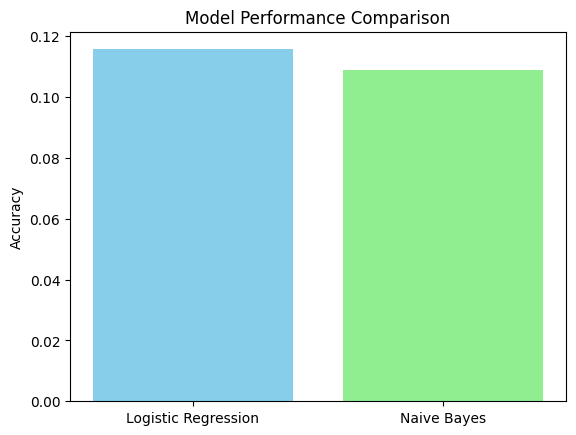

In [ ]:
results = {
    "Logistic Regression": accuracy_score(y_test, y_pred),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb),
}

print("📊 Model Comparison:", results)

plt.bar(results.keys(), results.values(), color=['skyblue','lightgreen'])
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()

💡 Top Positive Words: ['test' 'seniormusiclover' 'jazzfestival' 'toes' 'affair' 'kicks' 'beauty'
 'world' 'reflecting' 'diversity']
💡 Top Negative Words: ['new' 'life' 'day' 'feeling' 'heart' 'like' 'nature' 'dreams' 'night'
 'journey']


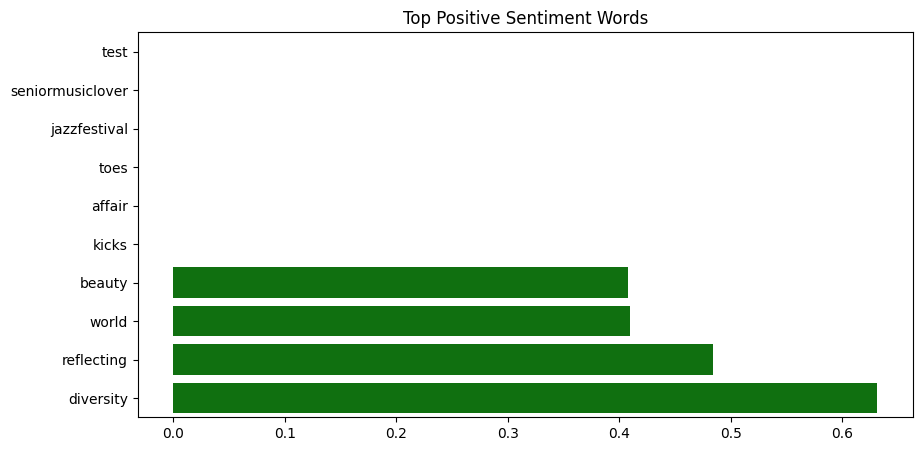

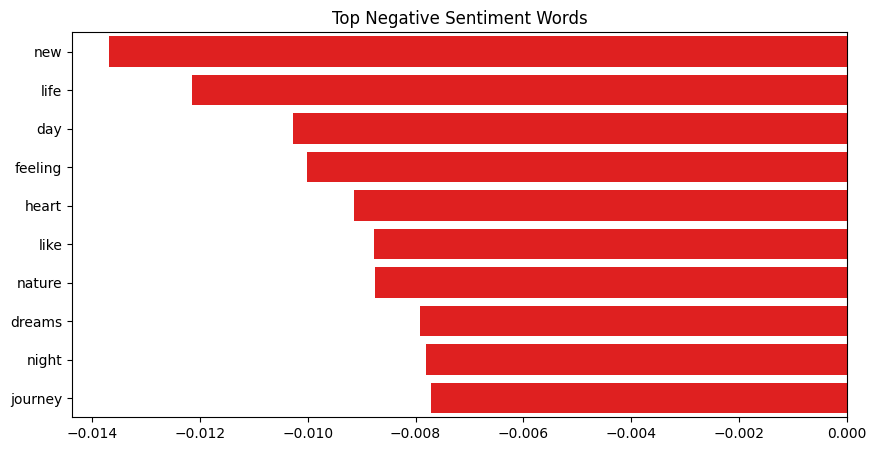

In [ ]:
feature_names = tfidf.get_feature_names_out()
coeffs = model.coef_[0]

top_pos = np.argsort(coeffs)[-10:]
top_neg = np.argsort(coeffs)[:10]

print("💡 Top Positive Words:", feature_names[top_pos])
print("💡 Top Negative Words:", feature_names[top_neg])

plt.figure(figsize=(10,5))
sns.barplot(x=coeffs[top_pos], y=feature_names[top_pos], color="green")
plt.title("Top Positive Sentiment Words")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=coeffs[top_neg], y=feature_names[top_neg], color="red")
plt.title("Top Negative Sentiment Words")
plt.show()

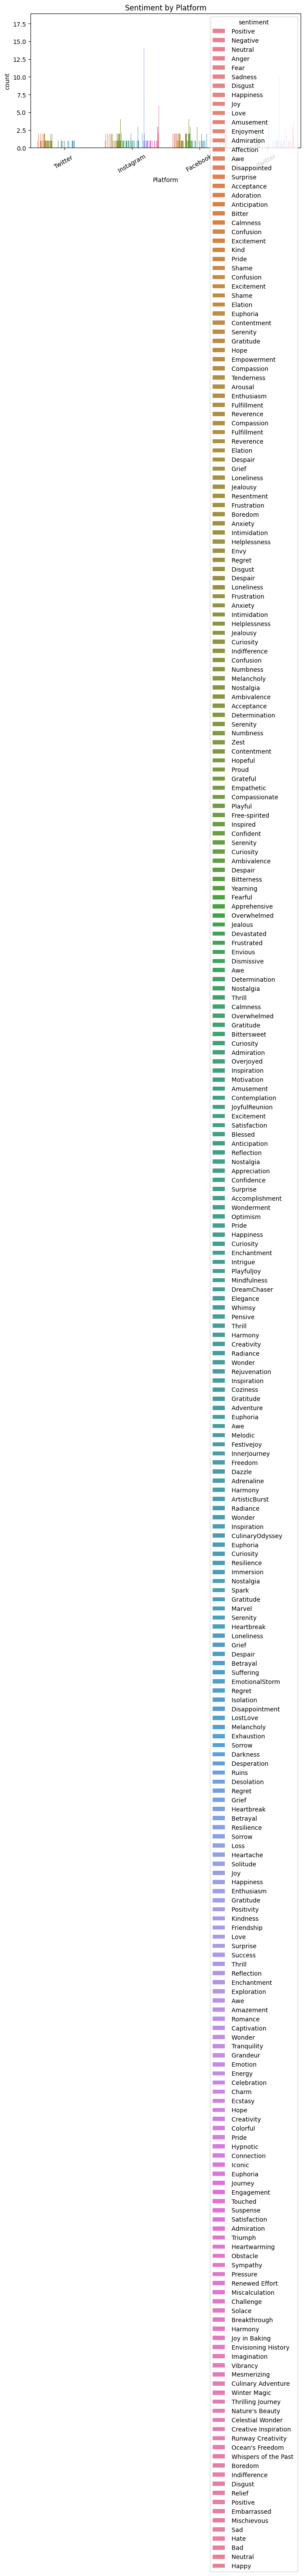

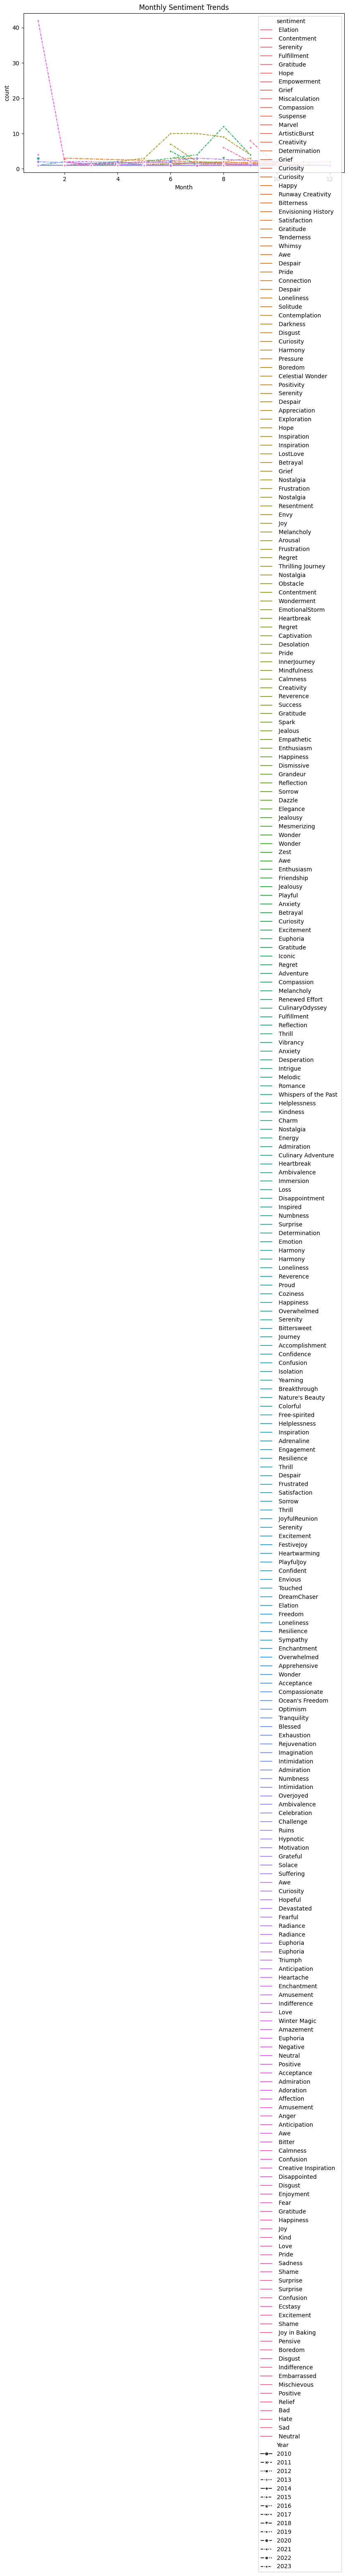

In [ ]:
if "Platform" in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x="Platform", hue="sentiment")
    plt.title("Sentiment by Platform")
    plt.xticks(rotation=30)
    plt.show()


if "Year" in df.columns and "Month" in df.columns:
    sentiment_trend = df.groupby(["Year","Month","sentiment"]).size().reset_index(name="count")
    plt.figure(figsize=(10,5))
    sns.lineplot(data=sentiment_trend, x="Month", y="count", hue="sentiment", style="Year", markers=True)
    plt.title("Monthly Sentiment Trends")
    plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [ ]:

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y)

y_train_enc = encoder.transform(y_train)
y_test_enc = encoder.transform(y_test)

print("Encoded Classes:", encoder.classes_)


Encoded Classes: [' Acceptance   ' ' Acceptance      ' ' Accomplishment ' ' Admiration '
 ' Admiration   ' ' Admiration    ' ' Adoration    ' ' Adrenaline     '
 ' Adventure ' ' Affection    ' ' Amazement ' ' Ambivalence '
 ' Ambivalence     ' ' Amusement    ' ' Amusement     ' ' Anger        '
 ' Anticipation ' ' Anticipation  ' ' Anxiety   ' ' Anxiety         '
 ' Appreciation  ' ' Apprehensive ' ' Arousal       ' ' ArtisticBurst '
 ' Awe ' ' Awe    ' ' Awe          ' ' Awe           ' ' Bad '
 ' Betrayal ' ' Betrayal      ' ' Bitter       ' ' Bitterness '
 ' Bittersweet ' ' Blessed       ' ' Boredom ' ' Boredom         '
 ' Breakthrough ' ' Calmness     ' ' Calmness      ' ' Captivation '
 ' Celebration ' ' Celestial Wonder ' ' Challenge ' ' Charm ' ' Colorful '
 ' Compassion' ' Compassion    ' ' Compassionate ' ' Confidence    '
 ' Confident ' ' Confusion ' ' Confusion    ' ' Confusion       '
 ' Connection ' ' Contemplation ' ' Contentment ' ' Contentment   '
 ' Coziness     ' ' C

In [ ]:
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_len),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(encoder.classes_), activation='softmax')
])

lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = lstm_model.fit(X_train_pad, y_train_enc, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 403ms/step - accuracy: 0.0345 - loss: 5.6135 - val_accuracy: 0.0000e+00 - val_loss: 5.6212
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 260ms/step - accuracy: 0.0658 - loss: 5.4145 - val_accuracy: 0.0000e+00 - val_loss: 5.6254
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step - accuracy: 0.0826 - loss: 5.2142 - val_accuracy: 0.0000e+00 - val_loss: 5.6495
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 262ms/step - accuracy: 0.0768 - loss: 5.1031 - val_accuracy: 0.0000e+00 - val_loss: 5.6578
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 353ms/step - accuracy: 0.0661 - loss: 5.1532 - val_accuracy: 0.0000e+00 - val_loss: 5.7276


In [ ]:
lstm_acc = lstm_model.evaluate(X_test_pad, y_test_enc, verbose=0)[1]
print("📈 LSTM Test Accuracy:", lstm_acc)

📈 LSTM Test Accuracy: 0.054421767592430115


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring="accuracy")
print("Cross-Validation Accuracy (Logistic Regression):", cv_scores.mean())

cv_scores_nb = cross_val_score(nb_model, X_train_tfidf, y_train, cv=5, scoring="accuracy")
print("Cross-Validation Accuracy (Naive Bayes):", cv_scores_nb.mean())

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy (Logistic Regression): 0.11452991452991453
Cross-Validation Accuracy (Naive Bayes): 0.10085470085470086


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
from wordcloud import WordCloud

for sentiment in df['sentiment'].unique():
    text_data = " ".join(df[df['sentiment']==sentiment]['text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment} Sentiment")
    plt.show()

In [ ]:
import joblib


joblib.dump(model, "logistic_sentiment_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

print("✅ Logistic Regression model & TF-IDF vectorizer saved.")


loaded_model = joblib.load("logistic_sentiment_model.pkl")
loaded_tfidf = joblib.load("tfidf_vectorizer.pkl")


sample_text = ["I love this product!", "This is the worst service ever"]
sample_features = loaded_tfidf.transform(sample_text)
print("Predictions:", loaded_model.predict(sample_features))